In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.shape

(1187, 38)

### Remove any rows with an invalid RespondentID

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [4]:
star_wars.RespondentID.isnull().sum()

1

In [5]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [6]:
star_wars = star_wars[star_wars.RespondentID.notnull()].copy()
star_wars.RespondentID.isnull().sum()

0

### Yes and No to True and False
* map(), dict, na_action

In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [9]:
yes_no = {'Yes' : True, 'No': False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [10]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [11]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Clean next 6 columns 
* Map them True and False
* Change column names to seen_1 to seen_6 to indicate whether respondent has seen Star Wars I to VI

In [12]:
cols_seen = star_wars.columns[3:9]
cols_seen

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [13]:
for col in cols_seen:
    print(star_wars[col].value_counts(dropna=False))

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64


In [14]:
for col in cols_seen:
    star_wars[col] = star_wars[col].map(lambda x : False if pd.isna(x) else True)
#star_wars['Unnamed: 4'].map(lambda x : True if not pd.isna(x) else False).value_counts(dropna=False)
for col in cols_seen:
    print(star_wars[col].value_counts(dropna=False))

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


In [15]:
star_wars.rename(columns = {cols_seen[0] : 'seen_1', cols_seen[1]: 'seen_2', cols_seen[2]: 'seen_3',
                           cols_seen[3]: 'seen_4', cols_seen[4]: 'seen_5', cols_seen[5]:'seen_6'}, inplace = True)

### Clean columns Rank, 10-15
* Rank the likely degree, 1 means most favorite, 6 means least favorite

In [16]:
cols_rank = star_wars.columns[9:15]
cols_rank

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [17]:
# Convert the datatype to float
star_wars[cols_rank] = star_wars[cols_rank].astype(float)
for n in range(1,7):
    star_wars.rename(columns = {cols_rank[n-1] : 'ranking_' + str(n)}, inplace = True)

In [18]:
star_wars.iloc[:, 9:15].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


In [19]:
wars_ranking_mean = star_wars.iloc[:, 9:15].mean()
wars_ranking_mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

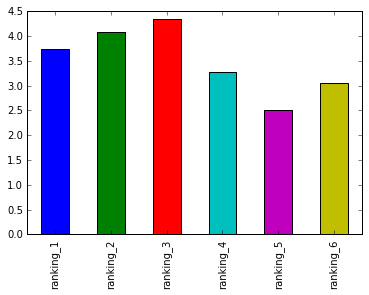

In [20]:
wars_ranking_mean.plot(kind = 'bar')

* Each movie is ranked by 1-6, 1 is most favorite and 6 is least favorite
* The bar chart is average mean rank for eahc movie. Movie 5 "Star Wars: Episode V The Empire Strikes Back" get the most favorite rank.

In [21]:
for col in star_wars.columns[3 :9]:
    print(star_wars[col].value_counts(dropna=False))

True     673
False    513
Name: seen_1, dtype: int64
False    615
True     571
Name: seen_2, dtype: int64
False    636
True     550
Name: seen_3, dtype: int64
True     607
False    579
Name: seen_4, dtype: int64
True     758
False    428
Name: seen_5, dtype: int64
True     738
False    448
Name: seen_6, dtype: int64


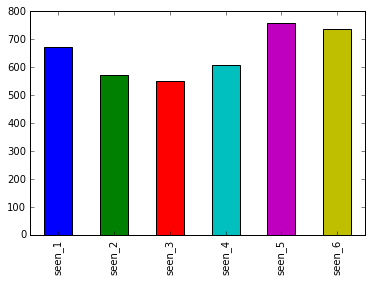

In [24]:
# Plot bar for sum of seen columns
star_wars.iloc[:, 3:9].sum().plot.bar()

* Star Wars episode which ranked better also have been watched by more respondents. Like episode V, which rank best by respondents, also watched by most people. While episode III, which least number respondents have watched it, also ranked worst.

## Separate group

In [26]:
star_wars.Gender.value_counts(dropna=False)

Female    549
Male      497
NaN       140
Name: Gender, dtype: int64

In [27]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [28]:
star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"].value_counts(dropna=False)

No     641
Yes    427
NaN    118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [29]:
# Split into two groups according on gender
group_male = star_wars[star_wars.Gender == "Male"].copy()
group_female = star_wars[star_wars.Gender == "Female"].copy()

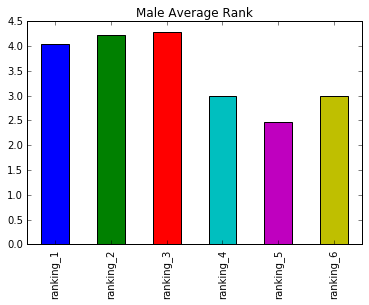

In [32]:
# rank columns [9:15], seen columns [3:9]
group_male.iloc[:, 9:15].mean().plot.bar(title='Male Average Rank')

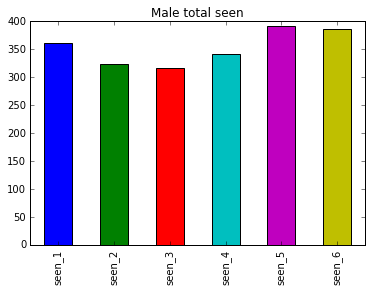

In [34]:
group_male.iloc[:, 3:9].sum().plot.bar(title = 'Male total seen')

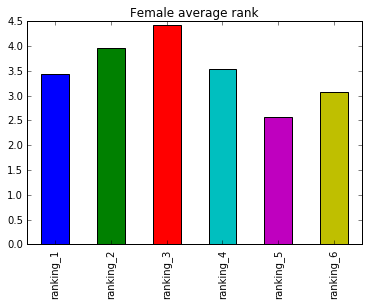

In [35]:
group_female.iloc[:, 9:15].mean().plot.bar(title = 'Female average rank')

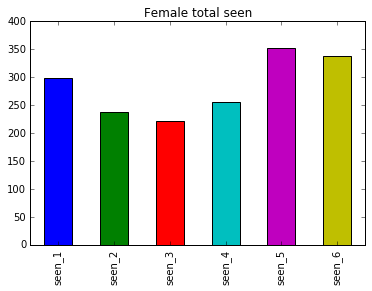

In [36]:
group_female.iloc[:, 3:9].sum().plot.bar(title = 'Female total seen')

* Overall trend are same as total population ones, but female group more steep.

Here are some potential next steps:

   * Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
   * Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
       * Which character do respondents like the most?
       - Which character do respondents dislike the most?
       - Which character is the most controversial (split between likes and dislikes)?
